# Linear Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.stats.api as sms
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import summary_table

sns.set()
%matplotlib inline

## Dataset
This project uses a Kaggle dataset from the 2019 World Happiness report from the United Nations that measures the happiness of more than 100 countries. Using this dataset we will explore the underlying assumptions of linear regression and build a linear regression model.

In [2]:
data = pd.read_csv(r'/Users/prof/Documents/Examples/WorldHappiness2019.csv')
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
#limiting the dataset to our variables of interest
modeldata = data[['Score','GDP per capita']]
modeldata.describe

<bound method NDFrame.describe of      Score  GDP per capita
0    7.769           1.340
1    7.600           1.383
2    7.554           1.488
3    7.494           1.380
4    7.488           1.396
..     ...             ...
151  3.334           0.359
152  3.231           0.476
153  3.203           0.350
154  3.083           0.026
155  2.853           0.306

[156 rows x 2 columns]>

# Data Discovery and Assumption Testing

In this section we will explore our data and test the assumptions of linear regression. First we plot each Countries Happiness score against the Gross Domestic Product (GDP) per captia. GDP is the final/total market value of all goods and services produces in country.

Text(0, 0.5, 'Happiness Score')

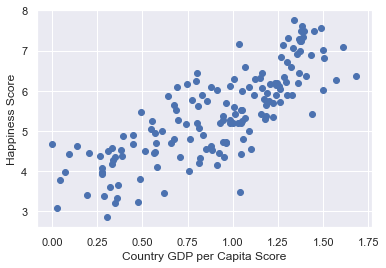

In [4]:
#Setting the variables
x = modeldata['GDP per capita']
y = modeldata['Score']

#Plotting Observed Values
plt.scatter(x, y)
plt.xlabel('Country GDP per Capita Score')
plt.ylabel('Happiness Score')

From the plot above, as GDP per Capita increase so does a countries happiness score, there seems to be a linear relationship between these two variables. Lets run our model and then test our assumptions for our linear regression model to make sure we arrive at the Best Linear Unbiased Estimator (BLUE). 

In [5]:
#Fitting linear regression model to our data
modeldata['Constant'] = 1 #Setting a constant value to force an intercept in Statsmodels OLS regression
linmodel = sm.OLS(modeldata['Score'], modeldata[['GDP per capita', 'Constant']])
modelfit = linmodel.fit()
modelfit.summary()

<ipython-input-5-aad7c3cea8a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modeldata['Constant'] = 1 #Setting a constant value to force an intercept in Statsmodels OLS regression


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     262.5
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           4.32e-35
Time:                        19:23:21   Log-Likelihood:                -159.97
No. Observations:                 156   AIC:                             323.9
Df Residuals:                     154   BIC:                             330.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
GDP per capita     2.2181      0.137     16.202      0.000       1.948       2.489
Constant           3.3993      0.135     25.120      0.000       3.132       3.667
==============================================================================
Omnibus:                        1.139   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.566   Jarque-Bera (JB):                1.244
Skew:                          -0.177   Prob(JB):                        0.537
Kurtosis:                       2.742   Cond. No.                         4.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
#Appending the original dataset with our predictions for later
modeldata['Predictions'] = modelfit.predict()

<ipython-input-6-2393000c7305>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modeldata['Predictions'] = modelfit.predict()


In [7]:
#Dropping the constant value in our model for plotting purposes
modeldata = modeldata.drop(['Constant'], axis = 1)

Before we move on to testing assumptions of our model let us look at some of the important outputs of our model above. We can interpret our parameter estimate as, a GPD per capita of zero results in a Happiness Score of 3.4, and then for a one unit increase in GDP per capita a country's happiness score would increase by 2.2 units. Keep in mind our GPD per capita has a minimum of 0 and a maximum of 1.68 so we are talking about fractions of units. This parameter estimate is also significant at the 95% confidence level with a p-value < 0.000. 

After running our model its important to test our model assumptions to ensure we are predicting BLUE coefficients. Below we will test/evaluate the following assumptions:
Linearity of the model
The Expectation or Mean of our residuals is Zero
Homoscedasticity - equal variance of residuals
No autocorrelation

### Linearity of the model
The assumption of linearity indicates that y is a linear function of x, if this assumption does not hold and we have non-linear relationships within the data we risk prediction errors. To test the linearity of the linearity of the model we can evaluate our predicted values against the observed y values and want to see a symmetrical distribution of points around our diagonal line. An alternative method is to evaluate the residual values plotted against our predicted y values where we want to see a symmetrical distribution of values around a (hopefully) horizontal line. 

Interpreting the plots below, for our predicted and observed values we see a linear relationship with a slight bend but our datapoints seem evenly distributed on either side of the red line. For our Predicted and residual values, we have a somewhat horizontal line with values fairly symmetrically distributed around the line. Based on these interpretations we can conclude there is a linear relationship between our variables.

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'Residuals')]

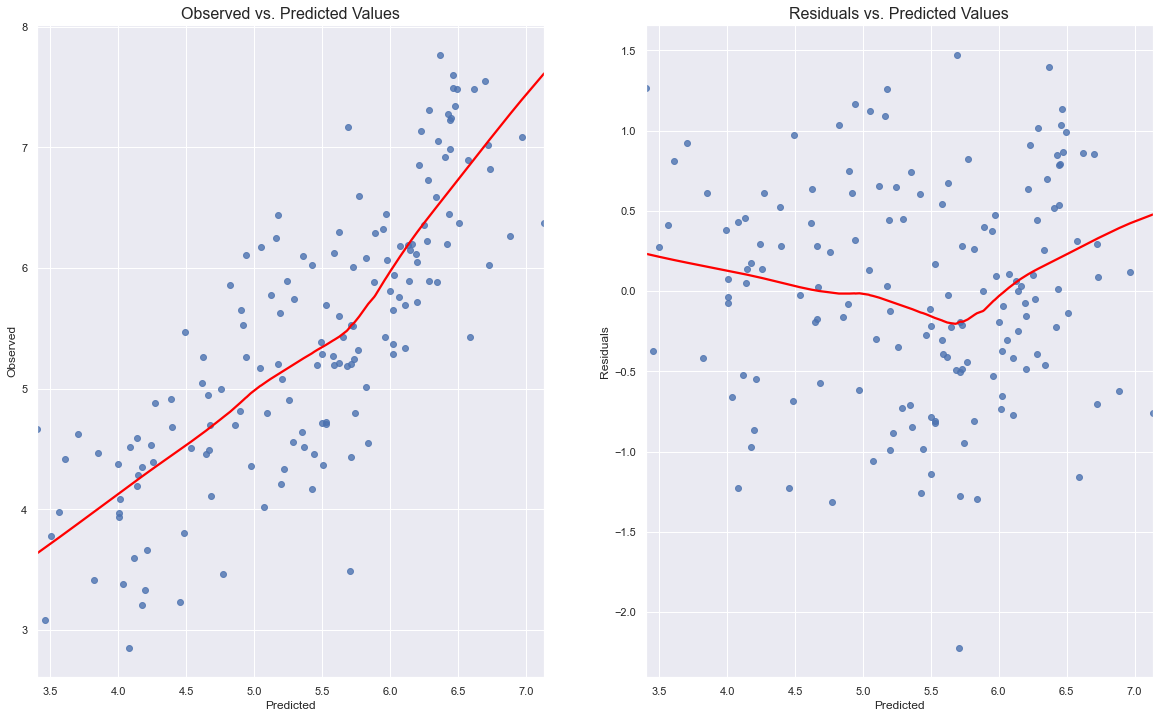

In [8]:
sns.mpl.rcParams['figure.figsize'] = (20, 12)

fitted_values = modelfit.predict()
resids = modelfit.resid

fig, ax = plt.subplots(1,2)

sns.regplot(x = fitted_values, y = y, lowess = True, ax = ax[0], line_kws = {'color' : 'red'})
ax[0].set_title('Observed vs. Predicted Values', fontsize = 16)
ax[0].set(xlabel = 'Predicted', ylabel = 'Observed')

sns.regplot(x = fitted_values, y = resids, lowess = True, ax = ax[1], line_kws = {'color' : 'red'})
ax[1].set_title('Residuals vs. Predicted Values', fontsize = 16)
ax[1].set(xlabel = 'Predicted', ylabel = 'Residuals')

### Expected Value of Residuals is Zero?
In linear regression, our objective is to fit a line through our datapoints where the sum of all differences between our predicted and actual values above the fitted line are equal to the sum of all differences between our predicted and actual values below the fitted line. 

From our result below we can conclude that the expected value (mean) of our residual values is zero.

In [9]:
modelfit.resid.mean()

-3.8715469576672126e-16

### Homoscedasticity
When the residuals from our model do not exhibit a constant variance, there will be issues determining the true standard deviation of our predictions. The inaccurate measurement of our standard deviation results in either too wide or too narrow confidence intervals for our predictions. When residuals do not exhibit a constant variance we call this heteroscedasticity, and we have a couple of methods to evaluate this assumption of our model. 

First we can look at a plot of the residuals against the predicted values, and we want to see an equal variance of our residuals across all of our observed y values. From the plot below we can conclude that across all fitted values on the X axis, there is an equal variance of the residual values. We can confirm this with the Breusch-Pagan test for homoscedasticity.

In the Breusch-Pagan (BP) test, the null hypothesis is our data exhibits homoscedasticity, if our BP test result has a p-value less than or equal to 0.05 then we would reject this null hypothesis at a 95% confidence level. In the BP test below our P-values are 0.81 which is greater than 0.05 so we would fail to reject the null hypothesis that our data is homoscedastic. 


 Breusch Pagan test
                                  Value
Lagrange multiplier statistic  0.054916
p-value                        0.814720
f-value                        0.054231
f p-value                      0.816168


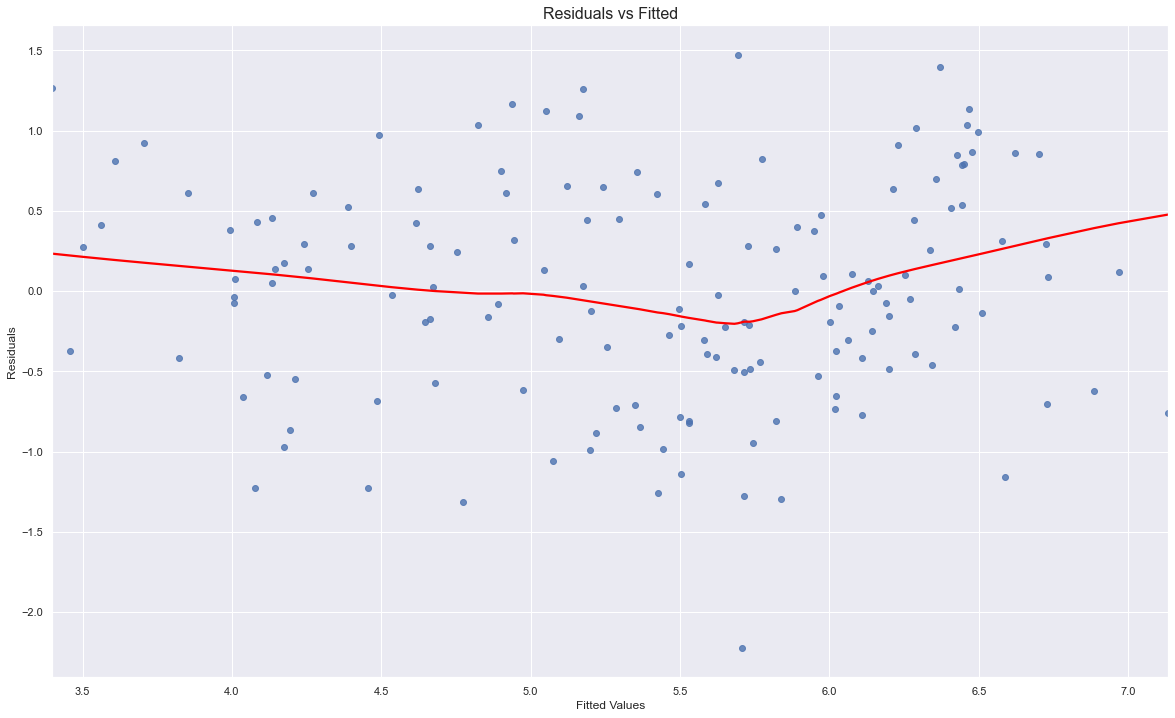

In [10]:
fitted_values  #Calculated earlier
resids         #Calculated earlier
resids_standardized = modelfit.get_influence().resid_studentized_internal


hetplot = sns.regplot(x = fitted_values, y = resids, lowess = True, line_kws = {'color' : 'red'}, )
hetplot.set_title('Residuals vs Fitted', fontsize = 16)
hetplot.set(xlabel = 'Fitted Values', ylabel = 'Residuals')

bp = pd.DataFrame(sms.het_breuschpagan(resids, modelfit.model.exog), 
                  columns = ['Value'], 
                  index = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])


print('\n Breusch Pagan test')
print(bp)